In [2]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     |████████████████████████████████| 881.9 MB 265 bytes/s  0:00:018   |█▏                              | 31.8 MB 876 kB/s eta 0:16:10     |█▌                              | 42.8 MB 385 kB/s eta 0:36:16     |███▍                            | 94.2 MB 418 kB/s eta 0:31:24     |█████▎                          | 145.9 MB 673 kB/s eta 0:18:13     |█████▍                          | 148.1 MB 306 kB/s eta 0:39:58     |██████▊                         | 185.8 MB 555 kB/s eta 0:20:54     |███████                         | 190.7 MB 537 kB/s eta 0:21:26     |███████                         | 192.4 MB 719 kB/s eta 0:15:59     |████████                        | 222.8 MB 424 kB/s eta 0:25:54     |█████████                       | 247.6 MB 451 kB/s eta 0:23:24     |██████████▋                     | 292.4 MB 427 kB/s eta 0:23:00     |████████████                    | 327.8 MB 260 kB/s eta 0:35:24     |█████

In [3]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     |████████████████████████████████| 63.6 MB 27 kB/s  eta 0:00:01K     |█▋                              | 3.2 MB 81 kB/s eta 0:12:21     |███████▎                        | 14.5 MB 511 kB/s eta 0:01:36
  Using cached opencv_python_headless-4.5.4.60-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.6 MB)


In [4]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

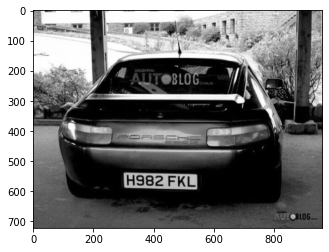

In [29]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

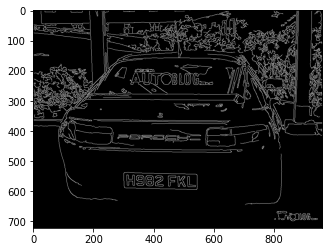

In [30]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [31]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [32]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [33]:
location


array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [34]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

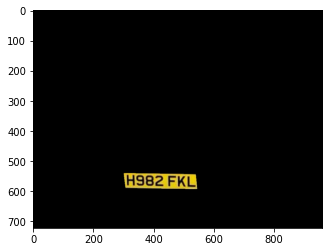

In [35]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [36]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

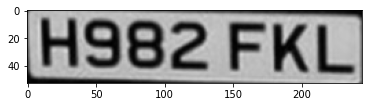

In [37]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [38]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9757376249451833)]

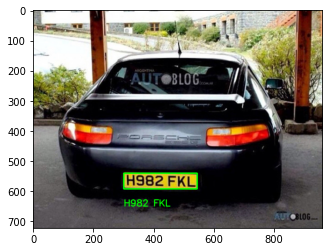

In [39]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))